## L1 and L2 Regularization

> L1 and L2 Regularization

In [ ]:
#| default_exp regularisation

In [ ]:
#| eval: false
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#| eval: false
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

**We are going to use Melbourne House Price Dataset where we'll predict House Predictions based on various features.**
#### The Dataset Link is
https://www.kaggle.com/anthonypino/melbourne-housing-market

In [ ]:
#| eval: false
# read dataset
dataset_og = pd.read_csv('./Data/Melbourne_housing_FULL.csv')

In [ ]:
#| eval: false
dataset_og.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
#| eval: false
dataset_og.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [ ]:
#| eval: false
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset_og[cols_to_use]

In [ ]:
#| eval: false
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [ ]:
#| eval: false
dataset.shape

(34857, 15)

#### Checking for Nan values

In [ ]:
#| eval: false
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [ ]:
#from sklearn.preprocessing import LabelEncoder

# Fit and transform the dates to numerical labels
#dataset['Date'] = LabelEncoder().fit_transform(dataset['Date'])


#### Handling Missing values

In [ ]:
#| eval: false
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())


**Drop NA values of Price, since it's our predictive variable we won't impute it**

In [ ]:
#| eval: false
dataset.dropna(inplace=True)

In [ ]:
#| eval: false
type(dataset)

pandas.core.frame.DataFrame

#### Let's one hot encode the categorical features

In [ ]:
#| eval: false
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.columns

Index(['Rooms', 'Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Price', 'Suburb_Aberfeldie',
       ...
       'CouncilArea_Moorabool Shire Council',
       'CouncilArea_Moreland City Council',
       'CouncilArea_Nillumbik Shire Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Whitehorse City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council'],
      dtype='object', length=745)

In [ ]:
#| eval: false
import seaborn as sn

In [ ]:
#| eval: false
dataset1 = dataset.astype(float)

np.set_printoptions(precision=2, suppress=True)
corrcoef = np.corrcoef(dataset1, rowvar=False)


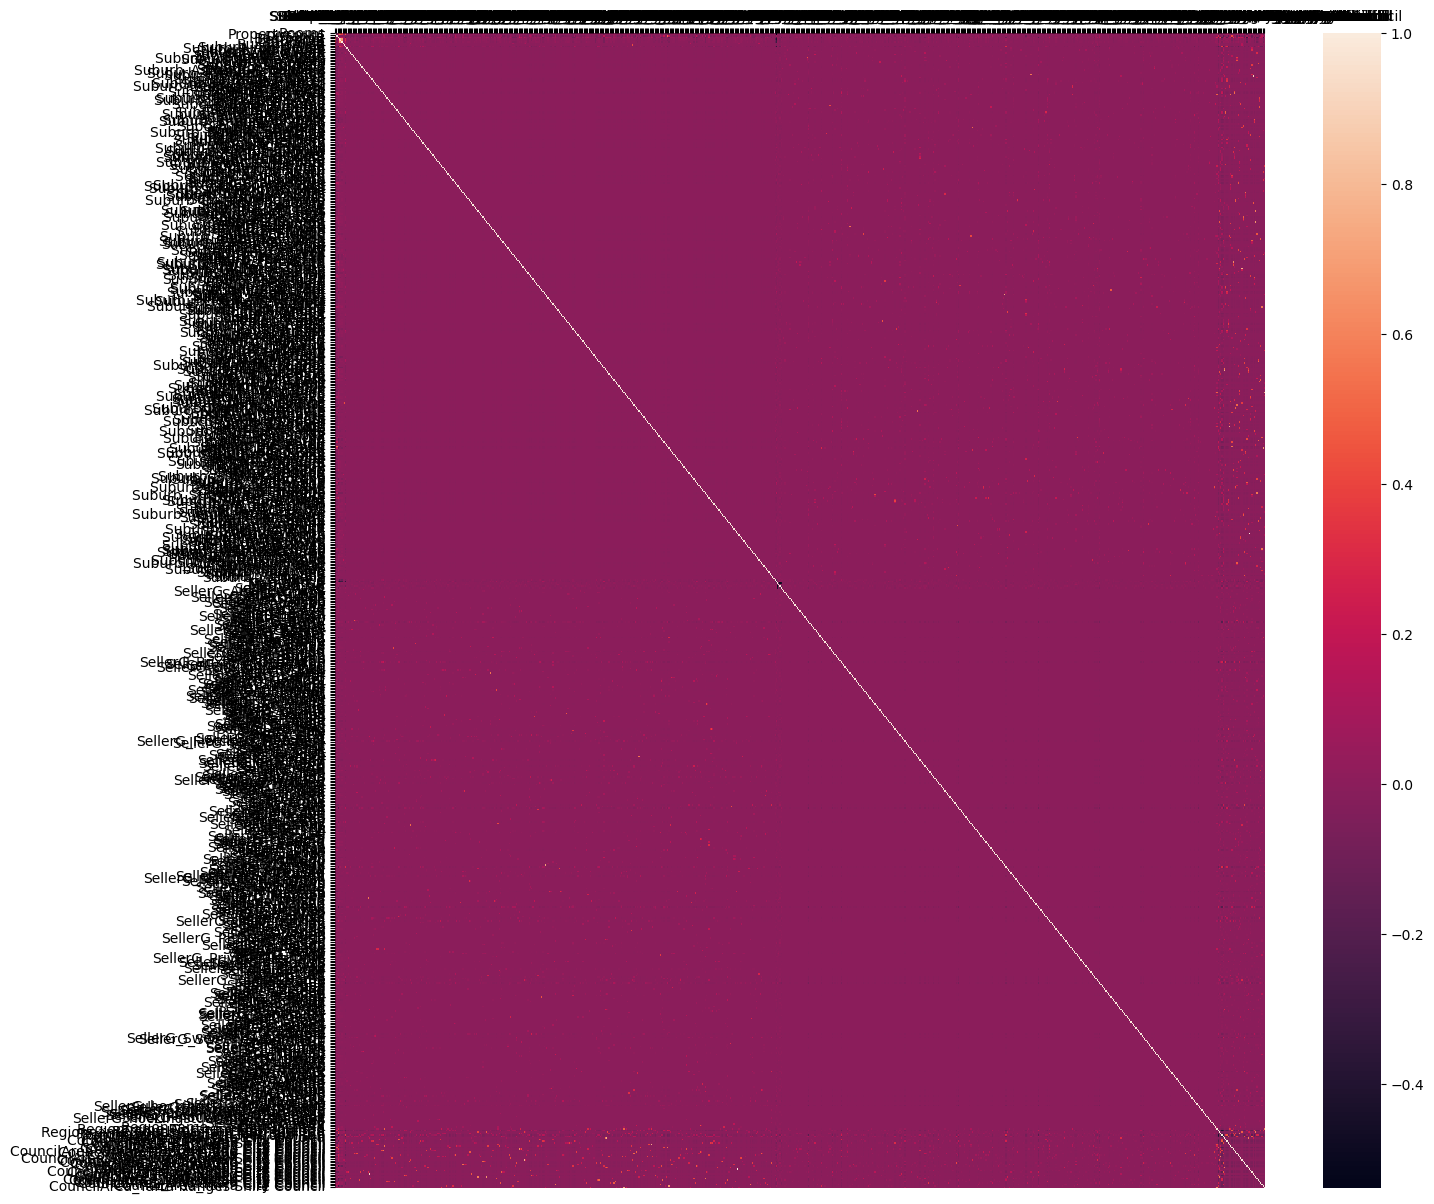

In [ ]:
#| eval: false
plt.figure(figsize=(15,15))
sn.heatmap(corrcoef)

plt.xticks(range(len(dataset.columns)), dataset.columns)
plt.yticks(range(len(dataset.columns)), dataset.columns)
# Move x-axis ticks and labels to the top
plt.gca().xaxis.set_ticks_position('top')


plt.show()

#### Let's bifurcate our dataset into train and test dataset

In [ ]:
#| eval: false
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [ ]:
#| eval: false
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

#### Let's train our Linear Regression Model on training dataset and check the accuracy on test set

In [ ]:
#| eval: false
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression()

In [ ]:
#| eval: false
reg.score(test_X, test_y)

0.13853683161649788

In [ ]:
#| eval: false
reg.score(train_X, train_y)

0.6827792395792723

**Here training score is 68% but test score is 13.85% which is very low**

## Normal Regression is clearly overfitting the data, let's try other models

### Using Lasso (L1 Regularized) Regression Model

In [ ]:
#| eval: false
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
#| eval: false
lasso_reg.score(test_X, test_y)

0.6636111369404488

In [ ]:
#| eval: false
lasso_reg.score(train_X, train_y)

0.6766985624766824

#### Using Ridge (L2 Regularized) Regression Model

In [ ]:
#| eval: false
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
#| eval: false
ridge_reg.score(test_X, test_y)

0.6670848945194958

In [ ]:
#| eval: false
ridge_reg.score(train_X, train_y)

0.6622376739684328

**We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too**